<a href="https://colab.research.google.com/github/Shakyanuz/google-colab-project/blob/main/dubai_real_estate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/Sales_Dubai_land.xlsx')
df.head(3)

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,102-1-2018,2018-01-02 08:41:49,53909358,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,...,85.94,NaN,DMCC-3029,Jumeirah Lakes Towers,Marina Mall,Sports City Swimming Academy,1,1,NaN,DUBAI STAR
1,102-1-2019,2019-01-02 08:11:24,305887533,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,...,68.82,1 B/R,P3-106,Dubai Internet City,Mall of the Emirates,Sports City Swimming Academy,1,1,NaN,Bloom Towers
2,102-1-2020,2020-01-02 07:29:48,664106052,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Al Wasl,Unit,...,23.63,Studio,EU,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Burj Khalifa,1,1,NaN,Rove City Walk


In [2]:
df.duplicated().sum()

0

In [3]:
df.columns

Index(['Transaction Number', 'Transaction Date', 'Property ID',
       'Transaction Type', 'Transaction sub type', 'Registration type',
       'Is Free Hold?', 'Usage', 'Area', 'Property Type', 'Property Sub Type',
       'Amount', 'Transaction Size (sq.m)', 'Property Size (sq.m)', 'Room(s)',
       'Parking', 'Nearest Metro', 'Nearest Mall', 'Nearest Landmark',
       'No. of Buyer', 'No. of Seller', 'Master Project', 'Project'],
      dtype='object')

In [4]:
df['Day'] = df['Transaction Date'].dt.day
df['Month'] = df['Transaction Date'].dt.month
df['Year'] = df['Transaction Date'].dt.year

In [5]:
df.isnull().sum()

Transaction Number              0
Transaction Date                0
Property ID                     0
Transaction Type                0
Transaction sub type            0
Registration type               0
Is Free Hold?                   0
Usage                           0
Area                            0
Property Type                   0
Property Sub Type            3223
Amount                          0
Transaction Size (sq.m)        92
Property Size (sq.m)            0
Room(s)                     41502
Parking                     80012
Nearest Metro               74519
Nearest Mall                75248
Nearest Landmark            42898
No. of Buyer                    0
No. of Seller                   0
Master Project             255299
Project                     43770
Day                             0
Month                           0
Year                            0
dtype: int64

In [6]:
def replacing_null (dataframe , columns):
    
    '''
    This function will help to replace null values with "Not identified" in all the selected columns
    '''
    
    for column in columns:
        
        dataframe[column].fillna('Not Identified', inplace = True)

In [7]:
columns = ['Nearest Metro','Nearest Mall','Nearest Landmark','Project','Parking','Room(s)','Property Sub Type' ]

In [8]:
replacing_null (df , columns)

In [9]:
df_drop = df.drop('Master Project',axis =1)

In [10]:
df_drop['Transaction Size (sq.m)'].fillna(df_drop['Transaction Size (sq.m)'].min(), inplace = True)

In [11]:
table = pd.DataFrame({'Unique':df_drop.nunique(),'Null':df_drop.isnull().sum(),'NullPercent':df_drop.isna().sum(),'Type':df_drop.dtypes.values})
table

,Unique,Null,NullPercent,Type
Transaction Number,255493,0,0,object
Transaction Date,254223,0,0,datetime64[ns]
Property ID,229279,0,0,int64
Transaction Type,1,0,0,object
Transaction sub type,17,0,0,object
Registration type,2,0,0,object
Is Free Hold?,2,0,0,object
Usage,2,0,0,object
Area,282,0,0,object
Property Type,3,0,0,object


In [12]:
num = df_drop.select_dtypes(exclude = 'O')
num.head(3)

,Transaction Date,Property ID,Amount,Transaction Size (sq.m),Property Size (sq.m),No. of Buyer,No. of Seller,Day,Month,Year
0,2018-01-02 08:41:49,53909358,840000.0,94.58,85.94,1,1,2,1,2018
1,2019-01-02 08:11:24,305887533,699000.0,68.01,68.82,1,1,2,1,2019
2,2020-01-02 07:29:48,664106052,733888.0,23.68,23.63,1,1,2,1,2020


In [13]:
cat =df_drop.select_dtypes(include = 'O')
cat.head(3)

,Transaction Number,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,Project
0,102-1-2018,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,Office,Not Identified,DMCC-3029,Jumeirah Lakes Towers,Marina Mall,Sports City Swimming Academy,DUBAI STAR
1,102-1-2019,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,Flat,1 B/R,P3-106,Dubai Internet City,Mall of the Emirates,Sports City Swimming Academy,Bloom Towers
2,102-1-2020,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Al Wasl,Unit,Hotel Rooms,Studio,EU,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Burj Khalifa,Rove City Walk


**Analysis Part**

In [14]:
# f_data = df_drop[df_drop[column]!='Not Identified']

In [86]:
def countplot_of_each_column (data , columns) :
    '''
    Since we are extracting count of multiple columns in one function, 
    for this we required for loop in column
    '''
    for column in columns:
        f_data = data[data[column]!='Not Identified']
        plt.figure(figsize=(20,6))
        graph = sns.countplot(x=column, data = f_data)
        plt.xticks(rotation = 90)
        # print(graph.get_yticks())
        ylabels = ['{:,.2f}'.format(x) for x in graph.get_yticks()*f_data[column].count().max()]
        graph.set_yticklabels(ylabels)


        plt.show()



In [67]:
def threshold (data, column, p_threshold):
    '''
     return only data values greater than threshold
    '''

    # find actual value of p_threshold in amount.
    amount_value = (p_threshold/100)*data[column].max()

    return (data[data[column]>amount_value])


In [84]:
threshold_crossed_data = threshold(df_drop, 'Amount', 20)
# threshold_crossed_data.head()

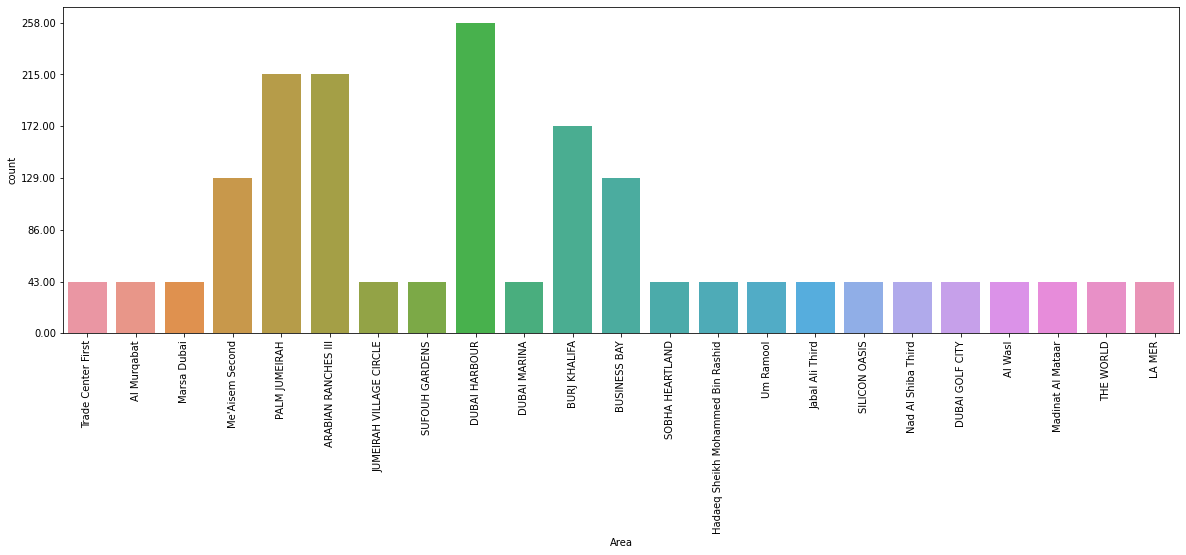

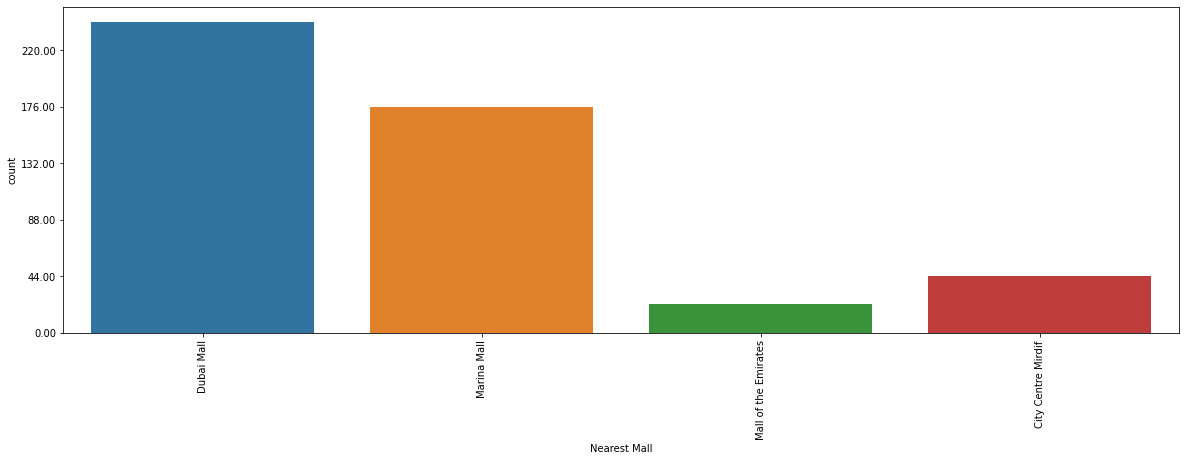

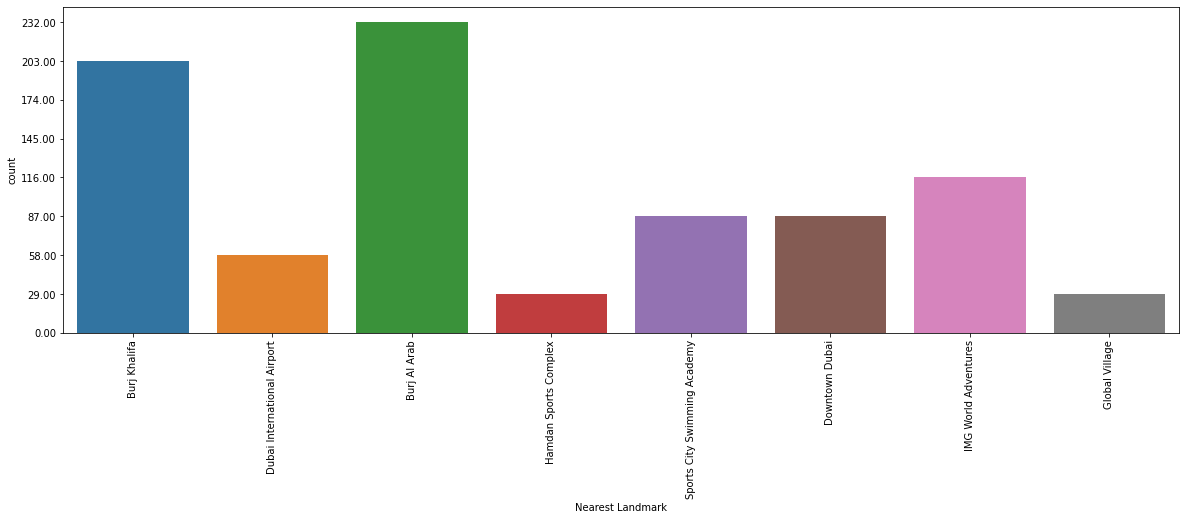

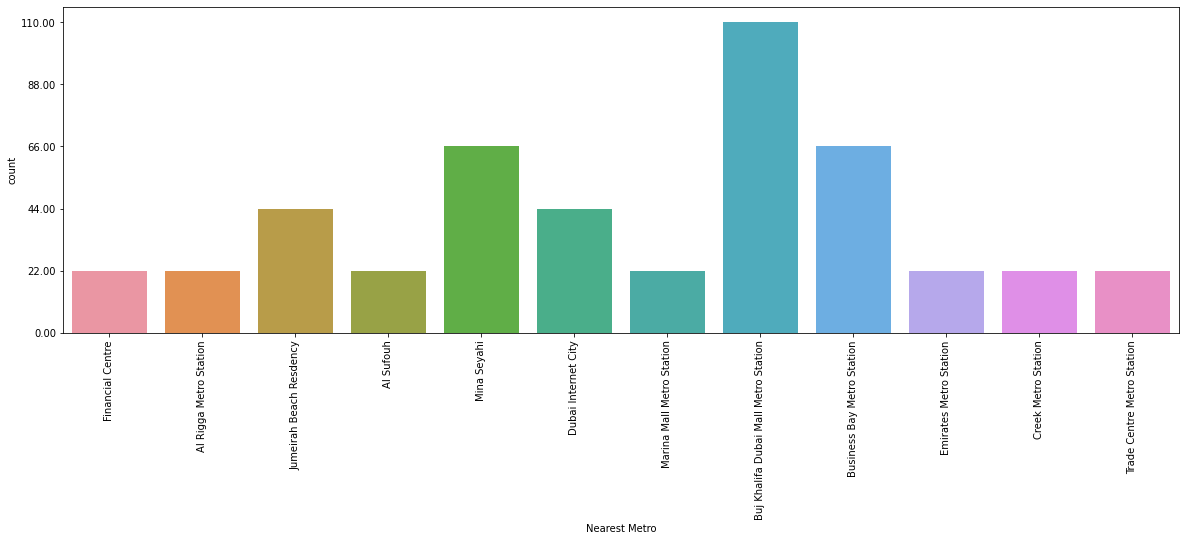

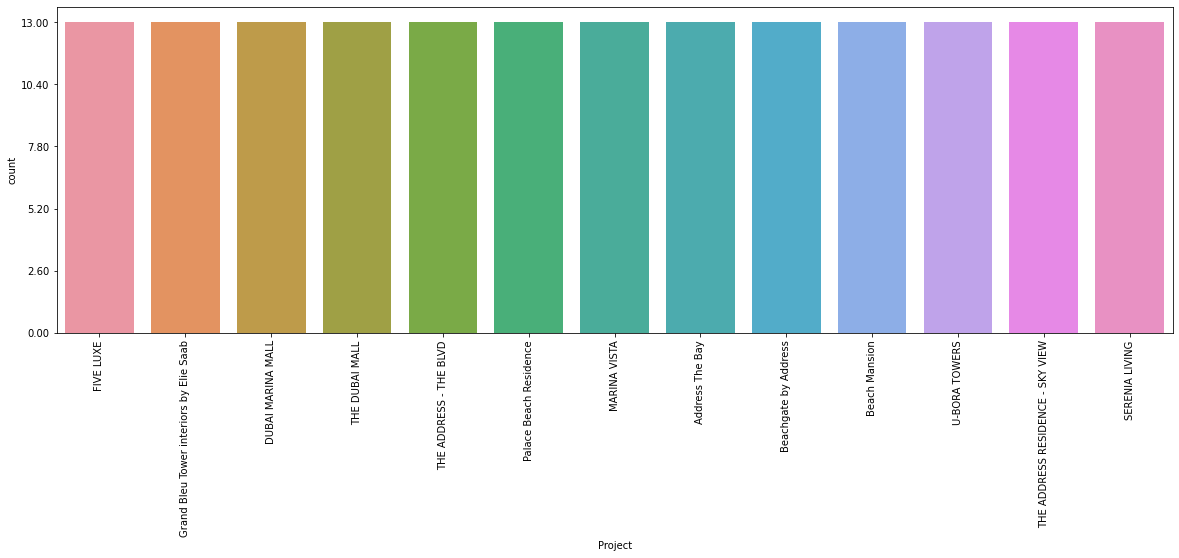

In [87]:
columns = ['Area','Nearest Mall','Nearest Landmark','Nearest Metro','Project']

countplot_of_each_column (threshold_crossed_data , columns)



In [17]:
def time_series_analysis (data):

    sns.lineplot(x=data['Year'].astype(str),y= data['Amount'].sum(), data=data, ci=None)
    plt.ylabel('Number of Transaction')

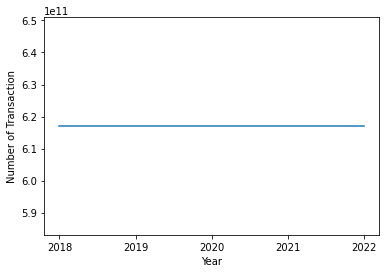

In [18]:
time_series_analysis (df_drop)

Multivariate Analysis

Boxplot

In [21]:
from matplotlib.cm import datad

def boxplot_for_column (data ,columns):

  for column in columns:
    f_data = data[data[column]!='Not Identified']

    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(data=f_data ,x=column, y='Amount')
    plt.xticks(rotation = 90)
     # plt.tight_layout()
    plt.show() 

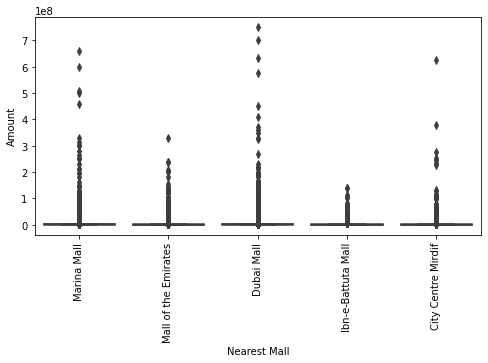

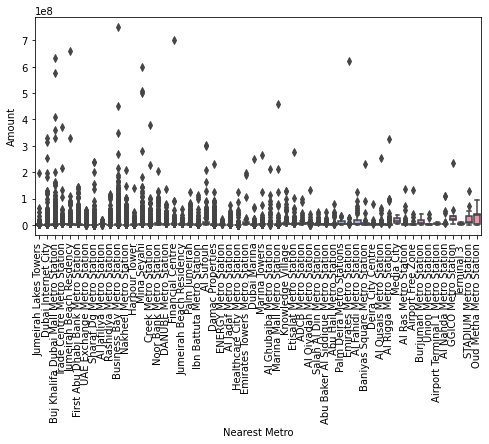

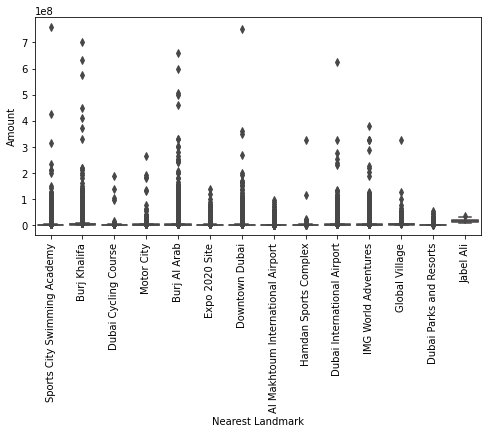

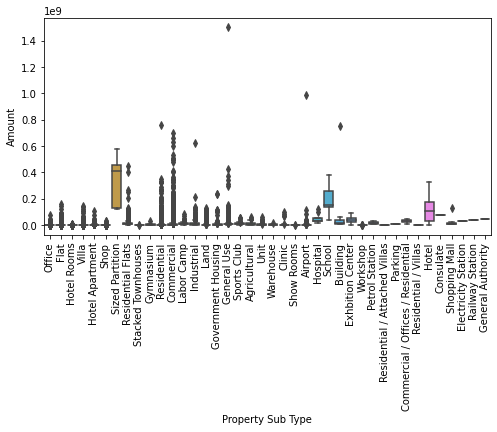

In [22]:
columns = ['Nearest Mall','Nearest Metro','Nearest Landmark','Property Sub Type']

boxplot_for_column (df_drop,columns)

In [39]:
def comparing_on_the_basis_of_area(data,columns):
    data=data.sort_values(by='Amount', ascending = False)
    # data.head(15)
    
    for column in columns:
        n_data = data[data[column]!='Not Identified']
        ax = plt.subplots(figsize=(15, 4))
        sns.barplot(data =n_data , x = column , y = 'Amount',estimator =sum)
        plt.xticks(rotation = 90)
        # plt.tight_layout()
        plt.show()

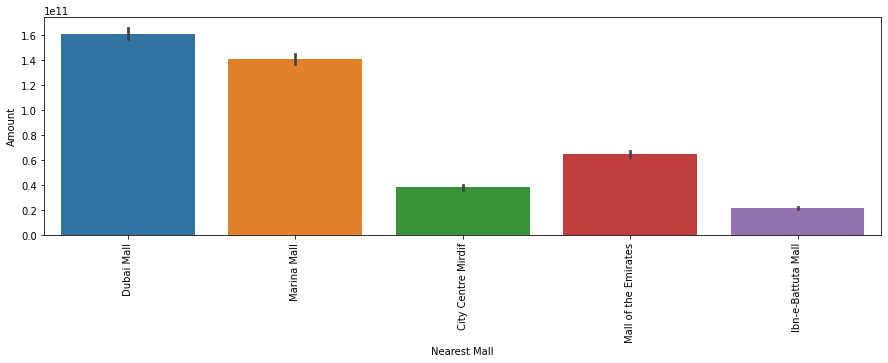

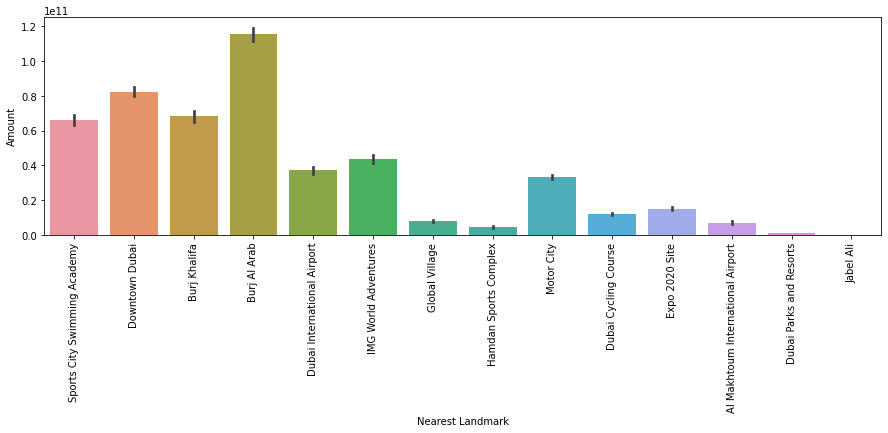

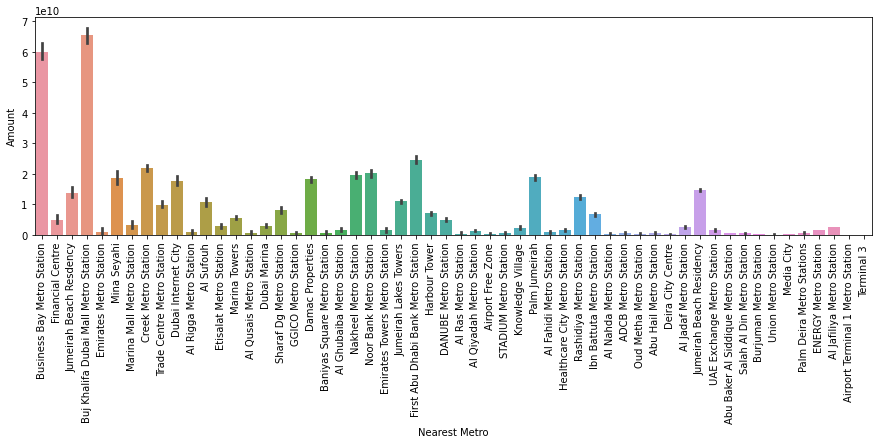

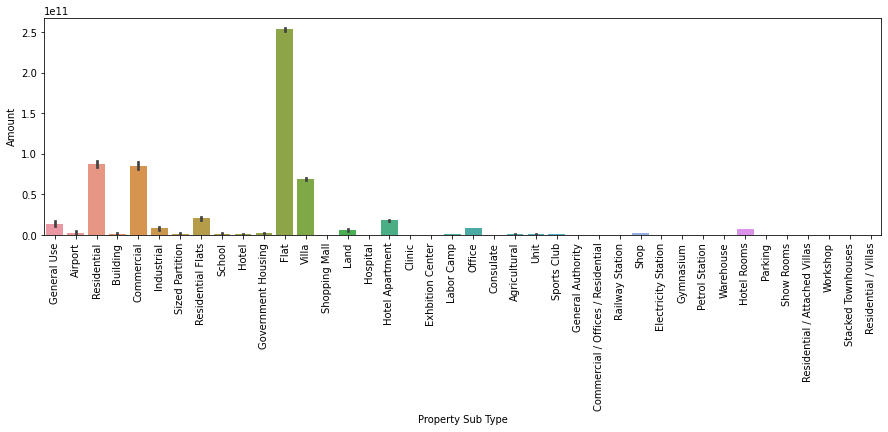

In [40]:
columns = [ 'Nearest Mall','Nearest Landmark','Nearest Metro', 'Property Sub Type']
# columns = ['Nearest Mall']

comparing_on_the_basis_of_area(df_drop,columns)

In [ ]:
sns.histplot(data = df , x = 'Amount')